# Support Vector Machine Classifiers 


<a id='question0'></a>

# Code

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
%matplotlib inline

## Load and display the training data

features size: (500, 2)
labels size: (500,)


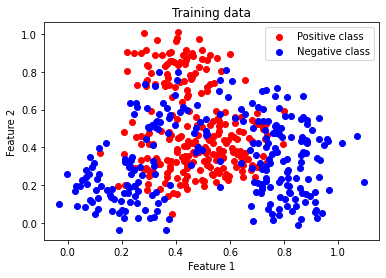

In [2]:
features = np.load("features.npy")
labels = np.load("labels.npy")
print("features size:", features.shape)
print("labels size:", labels.shape)

# Extract features for both classes
pos = labels == 1  # 1D array of booleans, with pos[i] = True if labels[i] == 1
features_pos = features[pos]  # filter the array with the boolean array
neg = labels != 1
features_neg = features[neg]

# Display data
fig, ax = plt.subplots()
ax.scatter(features_pos[:, 0], features_pos[:, 1], c="red", label="Positive class")
ax.scatter(features_neg[:, 0], features_neg[:, 1], c="blue", label="Negative class")
ax.set_title("Training data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()

plt.show()

<a id='third-cell'></a>

## Training the SVM classifier with arbitrary hyperparameters

In [3]:
cost = 1
gamma = 1

# Train the SVM classifier.
svm = SVC(C=cost, kernel='rbf', gamma=gamma)
svm.fit(features, labels)

# Predict labels.
# Note that here we use the same set for training and testing,
# which is not the case in the remainder of the assignment.
predicted_labels = svm.predict(features)

# Compute the error.
error = sum(labels != predicted_labels)
print("Prediction error:", error)

Prediction error: 98


<a id='question1'></a>

## Training with K-fold cross-validation

### Define test values for the cost and precision parameters 

In [4]:
def logsample(start, end, num):
    return np.logspace(np.log10(start), np.log10(end), num, base=10.0)

num_gammas = 20
num_costs = 20
gamma_range = logsample(1e-1, 1e3, num_gammas)
cost_range = logsample(1e-1, 1e3, num_costs)

<a id='question1a'></a>

### Compute the cross-validation error for each parameter combination

The `KFold` class from scikit-learn is a "cross-validation" object, initialized with a number of folds. For each fold, it randomly partitions the input data into a training set and a validation set. The <a href='http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html'>documentation</a> provides an example of use.

In [5]:
K = 10  # number of folds for cross validation
kf = KFold(n_splits=K)
cv_error = np.zeros((num_gammas, num_costs))  # error matrix

for i in range(num_gammas): 
    for j in range(num_costs): 
        sum1 = 0
        for train_index, test_index in kf.split(features):
            X_train = features[train_index,:]
            Y_train = labels[train_index]
            X_test = features[test_index, :]
            Y_test = labels[test_index]
            svm = SVC(C = cost_range[j], kernel = 'rbf', gamma = gamma_range[i])
            svm.fit(X_train, Y_train)
            predict_label = svm.predict(X_test)
            sum1 = sum1 + sum(predict_label != Y_test) 
        cv_error[i,j] = sum1/10 
        
        #print(cv_error)


<a id='question1b'></a>

### Train the classifier with the best parameter combination

In [6]:
# Find gamma and cost giving the smallest error

min_error = np.argmin(cv_error) #minumum error 
min_error_index = np.unravel_index(min_error, cv_error.shape) #locate indices of minimum error, with the shape of cv_error
gamma = gamma_range[min_error_index[0]] #obtain corresponding gamma
cost = cost_range[min_error_index[1]] #obtain  corresponding cost

# Train the SVM classifier using these parameters
svm = SVC(C=cost, kernel='rbf', gamma=gamma)
svm.fit(features, labels)
support_vectors = svm.support_vectors_

<a id='question1c'></a><a id='question2'></a>

### Display cross-validation results and decision function

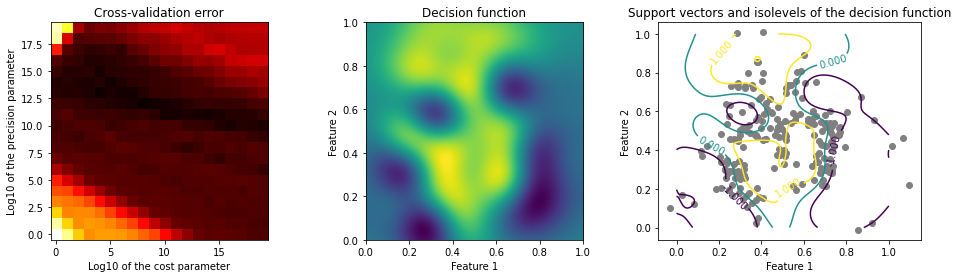

In [10]:
# Sample points on a grid
num_points = 100
x_rng = np.linspace(0, 1, num_points)
y_rng = np.linspace(0, 1, num_points)
grid_x, grid_y = np.meshgrid(x_rng, y_rng)

# Evaluate decision function for each point
xy_list = np.column_stack((grid_x.flat, grid_y.flat))
values = svm.decision_function(xy_list)
values = values.reshape((num_points, num_points))

# Display
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 3, 1)
ax.set_title("Cross-validation error")
ax.set_xlabel("Log10 of the cost parameter")
ax.set_ylabel("Log10 of the precision parameter")

ax.imshow(cv_error, cmap = 'hot', origin = 'lower')

ax = fig.add_subplot(1, 3, 2)
ax.set_title("Decision function")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.imshow(values, extent=[0, 1, 0, 1], origin='lower')

ax = fig.add_subplot(1, 3, 3)
ax.set_title("Support vectors and isolevels of the decision function")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")


contour = ax.contour(grid_x, grid_y, values, [-1,0,1]) #draw contour lines with same shape created by np.meshgrid as above, and values reshaped to the correct shape
ax.clabel(contour, contour.levels) #label contour lines
ax.scatter(support_vectors[:,0], support_vectors[:,1], c = 'grey') #scatter plot to display support vectors 

plt.show()

## Generalization error

### Load the test data

In [11]:
# Load the training data
test_features = np.load("test_features.npy")
test_labels = np.load("test_labels.npy")
print(test_features.shape)
print(test_labels.shape)

(500, 2)
(500,)


<a id='question3'></a>

### Print the number of misclassified points in the test set

In [12]:
classifier = svm.predict(test_features)
print(sum(test_labels != classifier))

90
